In [ ]:
"""
Predição do índice de Valores de Garantia de Imóveis Residenciais Financiados (IVG-R)
https://dadosabertos.bcb.gov.br/dataset/21340-indice-de-valores-de-garantia-de-imoveis-residenciais-financiados-ivg-r
"""

In [11]:
#Bibliotecas
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Import do csv
df = pd.read_csv("bcdata.sgs.21340.csv",sep=";")#Csv importado estava separado por ";".
df = df.replace(',', '.', regex=True) #Csv importado possuia o decimal com ",", corrigido para ".".
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y') #Tranformando em um objeto data no formato 'dd/mm/yyyy'
df

,data,valor
0,2001-03-01,100.00
1,2001-04-01,100.08
2,2001-05-01,100.15
3,2001-06-01,100.22
4,2001-07-01,100.29
...,...,...
274,2024-01-01,679.68
275,2024-02-01,682.40
276,2024-03-01,685.13
277,2024-04-01,687.86


In [13]:
#Exploração rapida de campos vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    279 non-null    datetime64[ns]
 1   valor   279 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.5+ KB


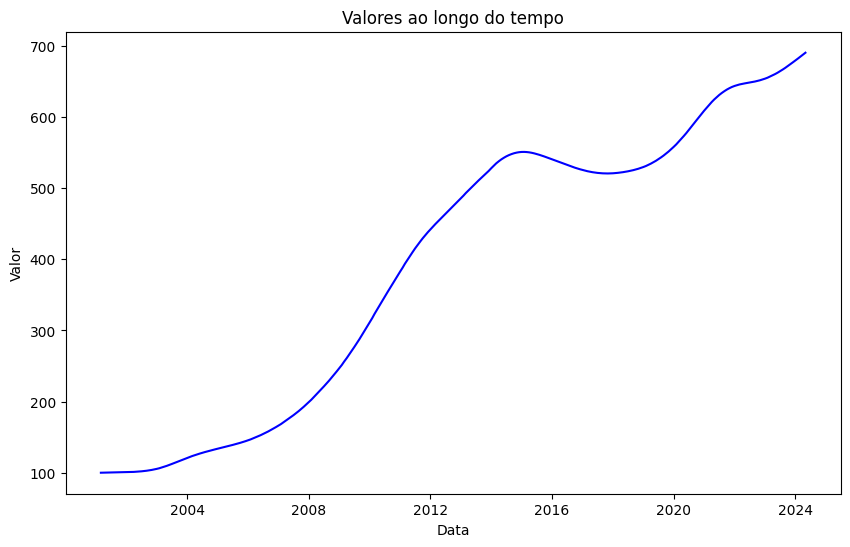

In [14]:
# Plotando os dados
df['valor'] = df['valor'].astype(float) #Tranforma os dados 'valor' em float
plt.figure(figsize=(10, 6))  #Define o tamanho da figura
plt.plot(df['data'], df['valor'], color='blue')
plt.title('Valores ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

In [23]:
# Separação das colunas 'data' e 'valor' para regressão
x = df[['data']]
y = df[['valor']]

In [24]:
# Conversão da coluna de datas para valores numéricos para a regressão
x_numeric = x['data'].astype(np.int64).values.reshape(-1, 1)

In [25]:
# Treinando modelo
model = linear_model.LinearRegression()
model.fit(x_numeric, y)

LinearRegression()

In [26]:
# Fazendo previsões usando o modelo treinado para reta de regressão
y_pred = model.predict(x_numeric)
df['pred'] = y_pred

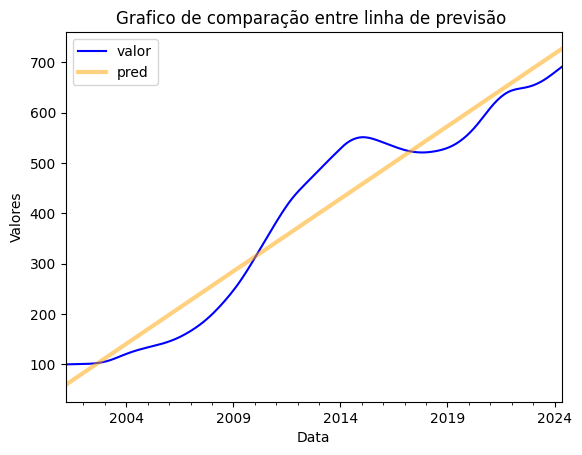

In [27]:
# Plotando os resultados
ax = df.plot(x='data', y='valor', color='blue') #Para poder plotar os graficos no mesmo plano é criado um 'ax'
df.plot(x='data', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Grafico de comparação entre linha de previsão ')
ax.set_xlabel('Data')
ax.set_ylabel('Valores')

plt.show()

In [ ]:
# Data de teste
data_para_prever = str(input('Insira a data: '))
data_para_prever_convertida = pd.to_datetime(data_teste, format='%d/%m/%Y')

# Converter a data para formato numérico e depois para um array 2D
data_para_prever_numeric = np.array([[data_teste_convertida.value]])

# Fazer a previsão
previsao = model.predict(data_para_prever_numeric)[0][0]
print(previsao)

In [30]:
import pandas as pd
import sklearn
import matplotlib
import numpy as np

print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("numpy version:", np.__version__)



pandas version: 2.2.2
scikit-learn version: 1.5.1
matplotlib version: 3.9.1
numpy version: 2.0.0
